<a href="https://colab.research.google.com/github/Chelagat-Pauline-G/MORINGA-DATA-SCIENCE-CORE-PROJECTS/blob/master/WEEK_2_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MORINGA DATA SCIENCE CORE WEEK 2 INDEPENDENT PROJECT** 

## 1. DEFINING THE QUESTION








### a) Specifying the Data Analytic Question

>Figure out how we can predict which individuals are most likely to have or use a bank account.

### b) Defining the Metric for Success

1. Which country did most participants come from?
2. Which year did most responents participate in the survey?
2. How many people have a bank account? What percentage is it of the total prople surveyed?
3. How many people live in rural and urban areas?
4. How many people have access to a cell phone?
5. What is the gender distribution of the respondents?
6. What is the distribution of household size of the respondents?
7. What variables are correlated with having a bank accout or not?
8. How much of a relationship is there between having the country one lives in and the type of location they live in?
9. Is there a relationship between the type of location one lives in and the their type of job?
10. What factors contribute largey to an individual having a bank account or not and if so what is their individual contributions?
11. 



### c) Understanding the context 

Financial inclusion has remained to be a main obstacle in Kenya, Uganda, Tanzania and Rwanda. In order to fully understand the state of financial inclusion in these countries we will need to look into demographic factors that drive individuals' economic outcomes as we figure out which individuals are most likely to use or have a bank account.

### d) Recording the Experimental Design

1. Load datasets
2. Check the data: information, description, shape, null values,missing data and duplicates
3. External data validation
4. Clean and tidying up the data:missing values, duplicates, outliers and anomalies
5. Data analysis:univariate, bivariate, multivariate 
6. Explore which variables/factors are useful in predicting whether an individual has a bank account or not.
7. Explore a predictive model for detetcing whether an individual has a bank account or not.


### e) Data Relevance

The data is relevant to answer the qestion at hand as it has the required fields.

## 2. READING THE DATA

In [ ]:
#Loading  our data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("http://bit.ly/FinancialDataset")


## 3. CHECKING THE DATA

In [ ]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 12)

In [ ]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the tail of our dataset
#
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Checking dataset details
#
df.describe()

#the mean household size is 3.68 and the mean age of the population is 38.8 years

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
# Checking for null values
#
df.isnull().sum().sort_values(ascending=False)

Has a Bank account        36
gender_of_respondent      34
Respondent Age            34
marital_status            32
Type of Job               30
Level of Educuation       29
household_size            28
Type of Location          15
country                   14
Cell Phone Access         11
The relathip with head     4
year                       0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    23524
dtype: int64

##4. EXTERNAL DATA VALIDATION

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.Link: https://www.financedigitalafrica.org/2018/03/19/can-big-data-shape-financial-services-in-east-africa/

##5. TIDYING UP THE DATA SET

In [ ]:
#Finding how many outliers are there in the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print("*"*100)
#(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))

##The IQR range for year is 2 years with a total of 3 years being outliers.
##The IQR range for household size is 3 with a total of 377 respondents being outliers.
##The IQR range for respondemts age is 241 years with a total of 3 years being outliers.

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64
****************************************************************************************************
household_size            377
Respondent Age            241
year                        3
uniqueid                    0
marital_status              0
gender_of_respondent        0
country                     0
Type of Location            0
Type of Job                 0
The relathip with head      0
Level of Educuation         0
Has a Bank account          0
Cell Phone Access           0
dtype: int64


In [ ]:
#Finding outliers in the household_size column
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['household_size'])

In [ ]:
#Finding outliers in the Respondent Age  column
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['Respondent Age'])

In [ ]:
#Finding outliers in the year column
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['year'])

[2029, 2056, 2039]

In [ ]:
#Removing the outliers in the dataset
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape


(22903, 13)

In [ ]:
#Finding null values
df_out.isnull().sum().sort_values(ascending=False)

Has a Bank account        36
gender_of_respondent      33
Respondent Age            33
marital_status            31
Type of Job               30
Level of Educuation       29
household_size            27
Type of Location          15
country                   14
Cell Phone Access         11
The relathip with head     4
uniqueid                   0
year                       0
dtype: int64

In [ ]:
#Filling the null values
df1=df_out.ffill(axis=0)
df1.shape

(22903, 13)

## 4. DATA ANALYSIS

###a. UNIVARIATE ANALYSIS

In [ ]:
#central tendency of age
print(df1['Respondent Age'].mean())
print(df1['Respondent Age'].mode())
print(df1['Respondent Age'].median())


38.337554032222855
0    30.0
dtype: float64
35.0


In [ ]:
#measures of dispersion of age
print(df1['Respondent Age'].std())
print(df1['Respondent Age'].var())

print(df1['Respondent Age'].skew())
print(df1['Respondent Age'].kurt())

#The graph for age of respodents is left skewed and flat peaked.

15.801188411812745
249.67755522560537
0.7411870091957976
-0.2359816624341824


In [ ]:
#central tendency of household size
print(df1['household_size'].mean())
print(df1['household_size'].mode())
print(df1['household_size'].median())

3.5718901453957996
0    2.0
dtype: float64
3.0


In [ ]:
#measures of dispersion of household size
print(df1['household_size'].std())
print(df1['household_size'].var())

print(df1['household_size'].skew())
print(df1['household_size'].kurt())
#The graph for household size of respodents is left skewed and flat peaked.

2.079245920039249
4.3232635959998635
0.6120410644272279
-0.4972744338000443


In [ ]:
df1.year.value_counts()

2016    8562
2018    7798
2017    6543
Name: year, dtype: int64

Text(0.5, 1.0, 'Number of people who participated in survey each year')

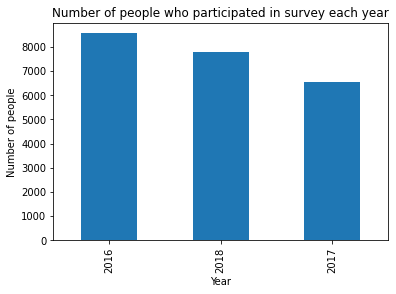

In [ ]:
#Which year did most responents participate in the survey?
df1['year'].value_counts().head().plot.bar()
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.title("Number of people who participated in survey each year")

Text(0.5, 1.0, 'Percentage of people who participated in survey each year')

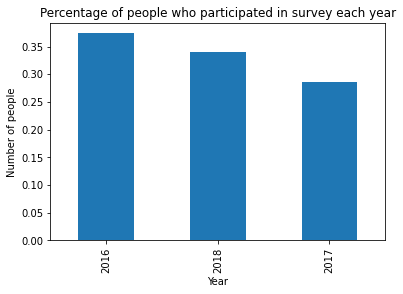

In [ ]:
#Percentage of people who participated in survey each year
(df1['year'].value_counts().head(10) / len(df1)).plot.bar()
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.title("Percentage of people who participated in survey each year")

In [ ]:
df1.country.value_counts()

Rwanda      8562
Tanzania    6543
Kenya       5871
Uganda      1927
Name: country, dtype: int64

Text(0.5, 1.0, 'Number of people who participated in survey each country')

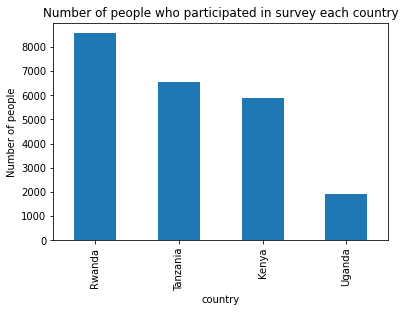

In [ ]:
#Number of people who participated in survey each country
df1['country'].value_counts().head().plot.bar()
plt.xlabel("country")
plt.ylabel("Number of people")
plt.title("Number of people who participated in survey each country")

Text(0.5, 1.0, 'Number of people who participated in survey each country')

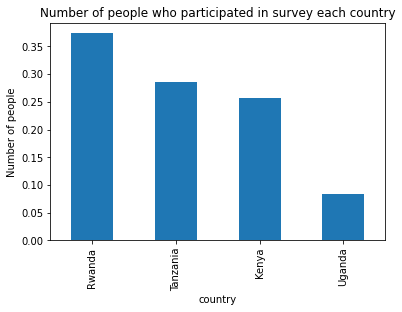

In [ ]:
#Number of people who participated in survey each country

(df1['country'].value_counts().head(10) / len(df1)).plot.bar()
plt.xlabel("country")
plt.ylabel("Number of people")
plt.title("Number of people who participated in survey each country")

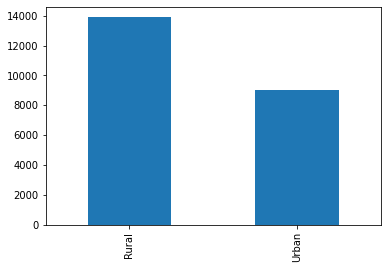

In [ ]:
#Type of location participants came from.
df1["Type of Location"].value_counts().head().plot.bar()

In [ ]:
df1.gender_of_respondent.value_counts()

Female    13504
Male       9399
Name: gender_of_respondent, dtype: int64

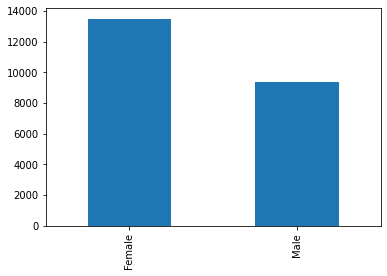

In [ ]:
#The distribution of the gender of the respodents
df1["gender_of_respondent"].value_counts().head().plot.bar()

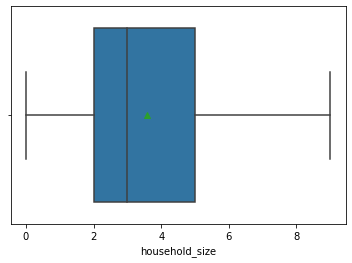

In [ ]:
sns.boxplot(df1["household_size"], showmeans=True)

No     19640
Yes     3263
Name: Has a Bank account, dtype: int64


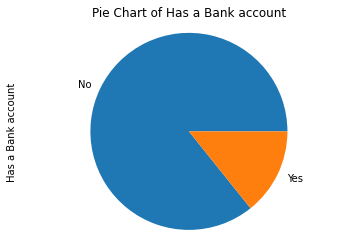

In [208]:
#How many people have a bank account?
print(df1['Has a Bank account'].value_counts())
df1["Has a Bank account"].value_counts()
df1["Has a Bank account"].value_counts().head().plot.pie()

plt.axis('equal')
plt.title('Pie Chart of Has a Bank account')
plt.show()

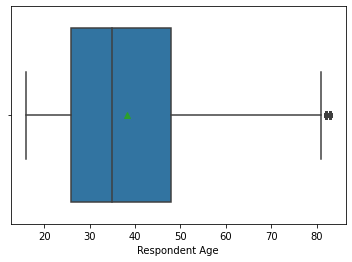

In [ ]:
sns.boxplot(df1["Respondent Age"], showmeans=True)

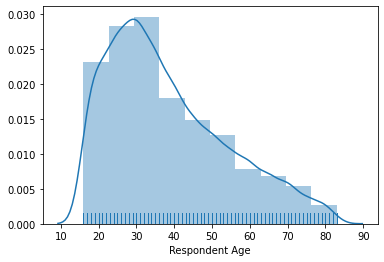

In [ ]:
#df1['Respondent Age'].hist()
sns.distplot(df1['Respondent Age'],hist=True,rug=True,bins=10)

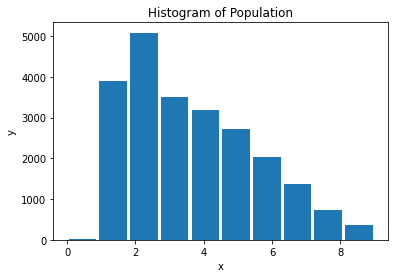

In [ ]:
#df1['household_size'].hist()
plt.hist(df1['household_size'], bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Population') 
plt.show()

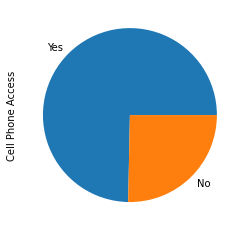

In [ ]:
df1["Cell Phone Access"].value_counts().head().plot.pie()

In [ ]:
df1.marital_status.value_counts()

Married/Living together    10469
Single/Never Married        7833
Widowed                     2528
Divorced/Seperated          2065
Dont know                      8
Name: marital_status, dtype: int64

In [ ]:
df1['The relathip with head'].value_counts()

Head of Household      12503
Spouse                  6407
Child                   2139
Parent                  1028
Other relative           645
Other non-relatives      181
Name: The relathip with head, dtype: int64

In [ ]:
df1['Type of Job'].value_counts()

Self employed                   6284
Informally employed             5527
Farming and Fishing             5315
Remittance Dependent            2389
Formally employed Private       1042
Other Income                    1029
No Income                        594
Formally employed Government     383
Government Dependent             221
Dont Know/Refuse to answer       119
Name: Type of Job, dtype: int64

In [ ]:
df1['Level of Educuation'].value_counts()

Primary education                  12535
No formal education                 4291
Secondary education                 4113
Tertiary education                  1146
Vocational/Specialised training      787
6                                     25
Other/Dont know/RTA                    6
Name: Level of Educuation, dtype: int64

###Recommendations
* Rwanda had most participants therefore it is likely that most of the people with a bank account are from Rwanda.
* The mean, mode and median age are 38.3, 30 and 35 years and a standard deviation of 15 years therefore one can predict that most of the people with a bank account are aged 23-53 years.
* MOst partciapnts did not have a cell bank account
* Most participants were female. 
* Most of the participants were either married or single. Most of the participants were the head of the household. Most of the participants are either self employed,informally employed or into farming and fishing.
Most of the participants(12535) in the survey had primary education. Most participants have access to a cell phone.
* Therefore individuals from Rwanda aged 30-38 years, who are either married or single and are the head of their family and either fomally or self employed with access to cell phone are likely to have a bank account.



###b. Bivariate analysis

In [ ]:
df3=df1a
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df3['country']=lb.fit_transform(df3['country'])
df3['Has a Bank account']=lb.fit_transform(df3['Has a Bank account'])
df3['Type of Location']=lb.fit_transform(df3['Type of Location'])
df3['Cell Phone Access']=lb.fit_transform(df3['Cell Phone Access'])
df3['gender_of_respondent']=lb.fit_transform(df3['gender_of_respondent'])
df3['The relathip with head']=lb.fit_transform(df3['The relathip with head'])
df3['marital_status']=lb.fit_transform(df3['marital_status'])
df3['Level of Educuation']=lb.fit_transform(df3['Level of Educuation'])
df3['Type of Job']=lb.fit_transform(df3['Type of Job'])
df3.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2018,1,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,0,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,1,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,0,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,0,1,0,8.0,26.0,1,0,3,3,5


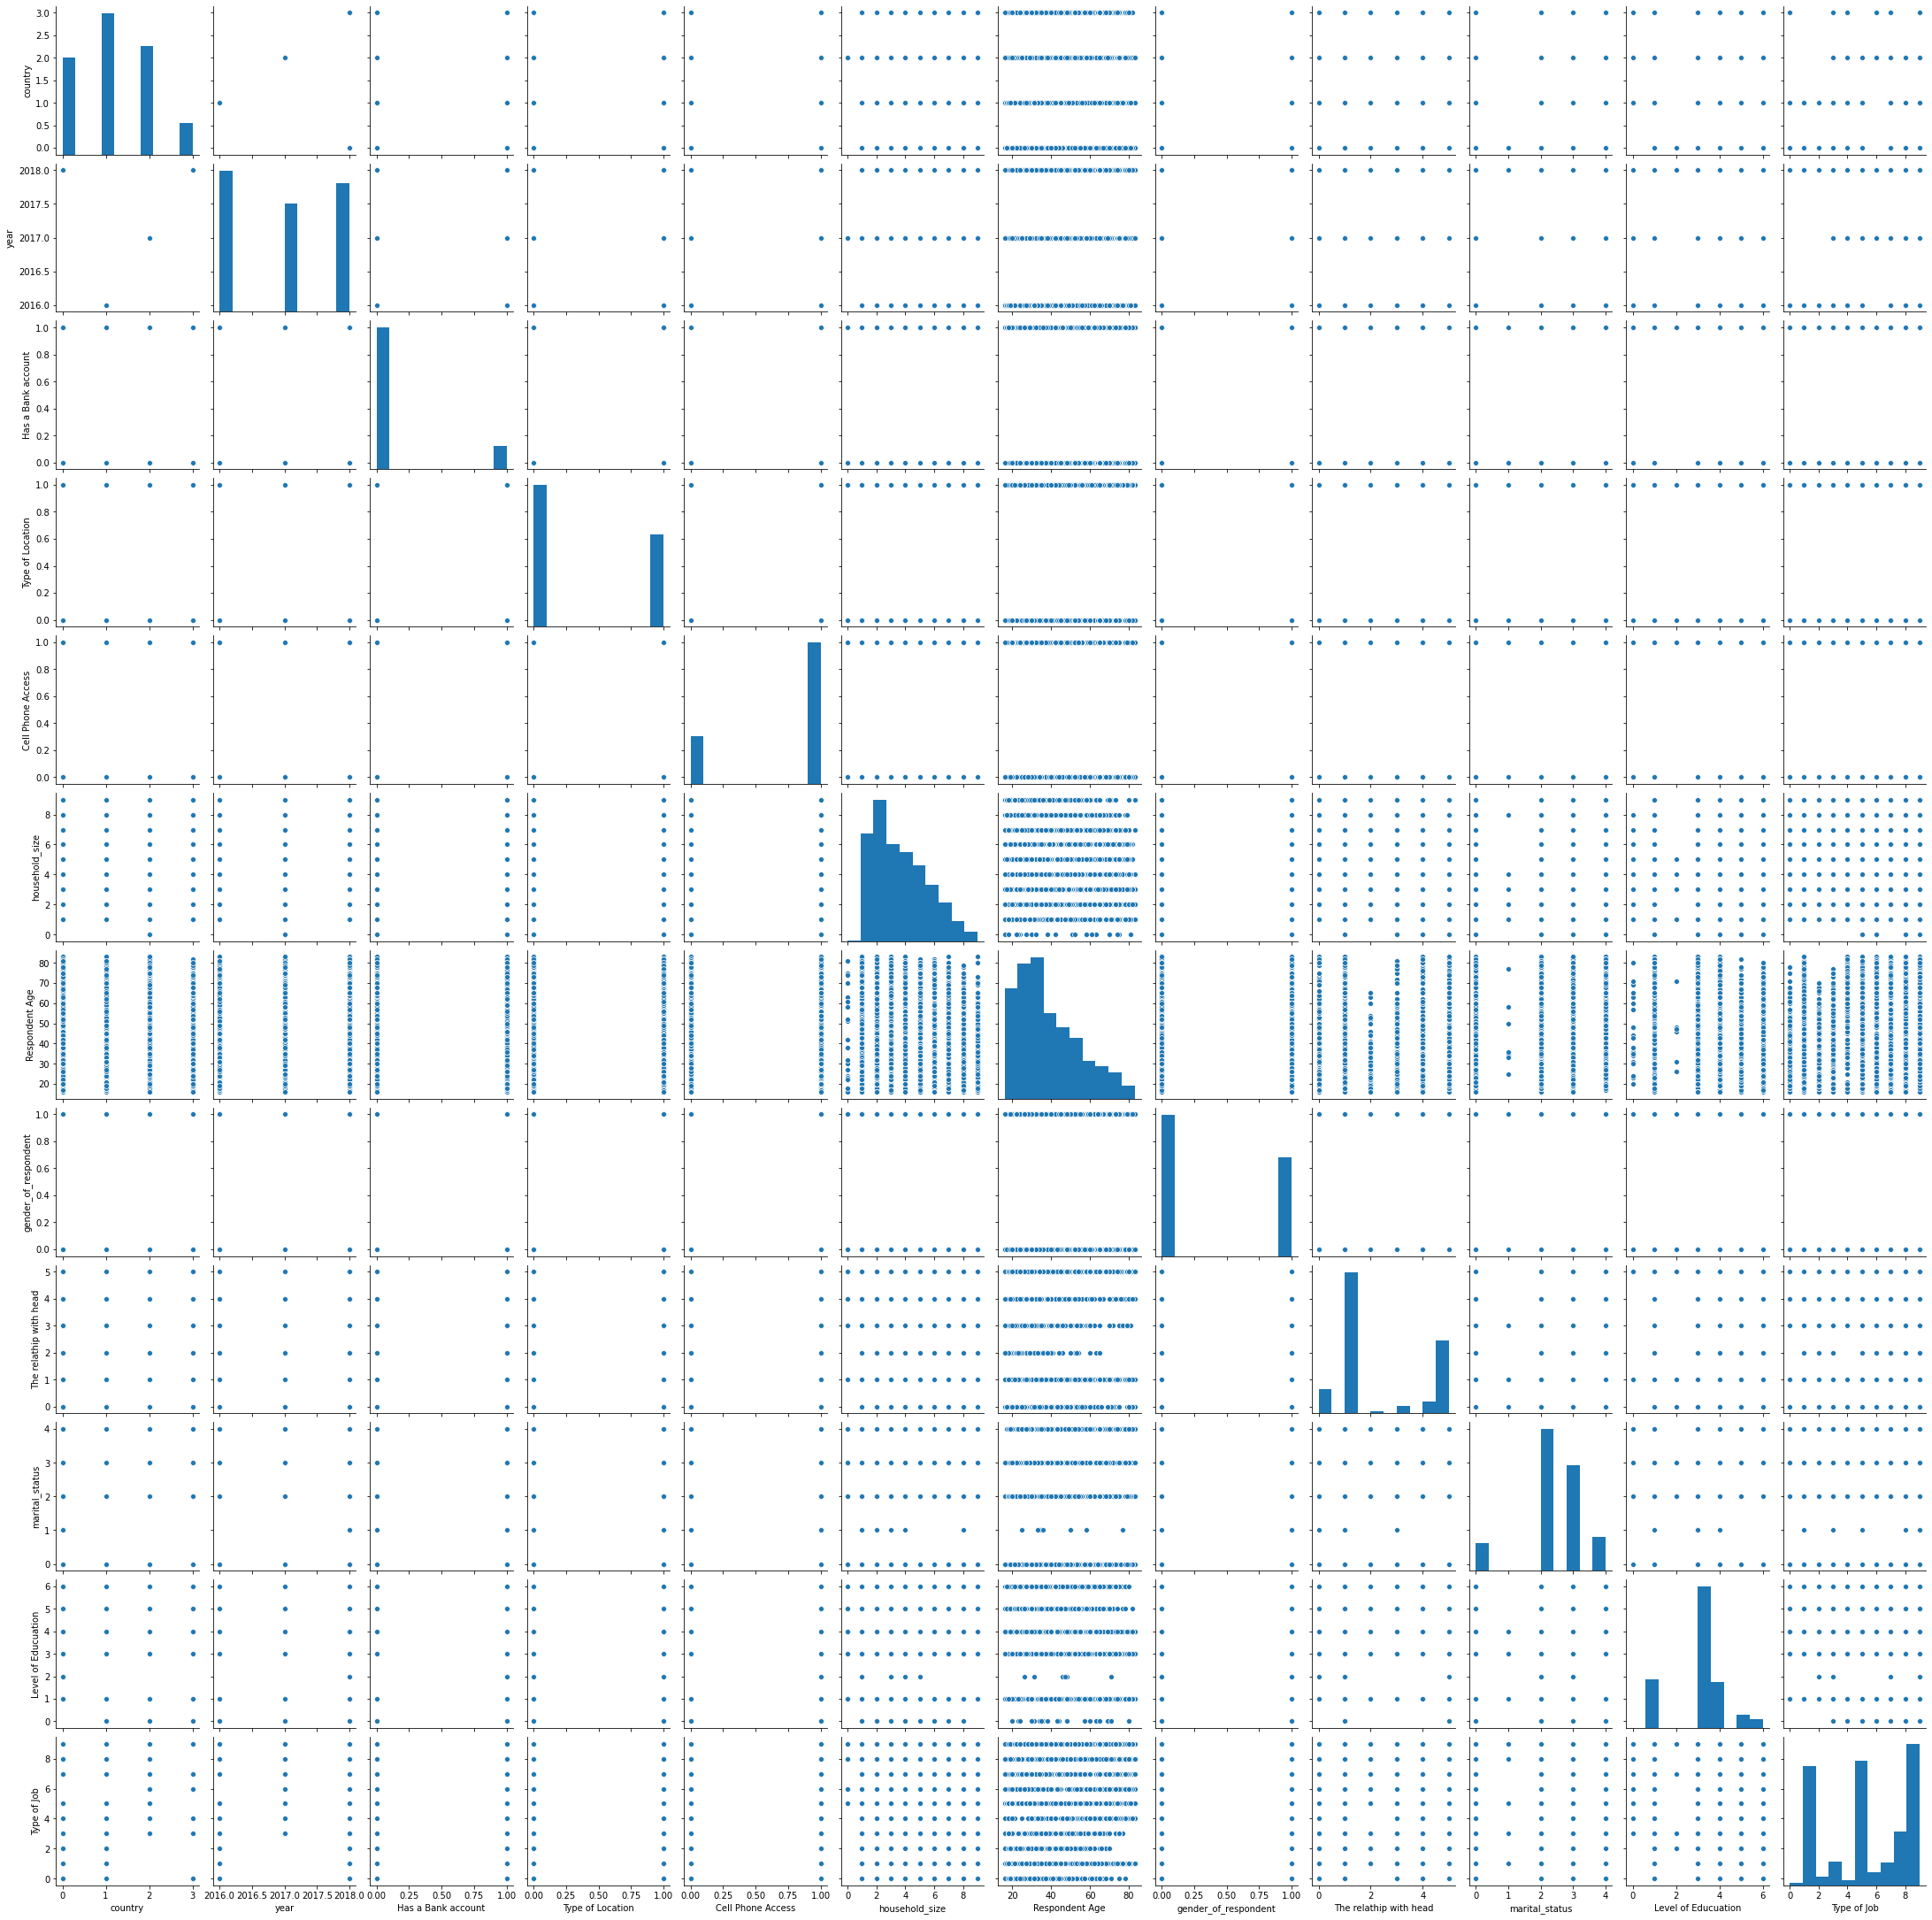

In [ ]:
sns.pairplot(df3)
plt.show()

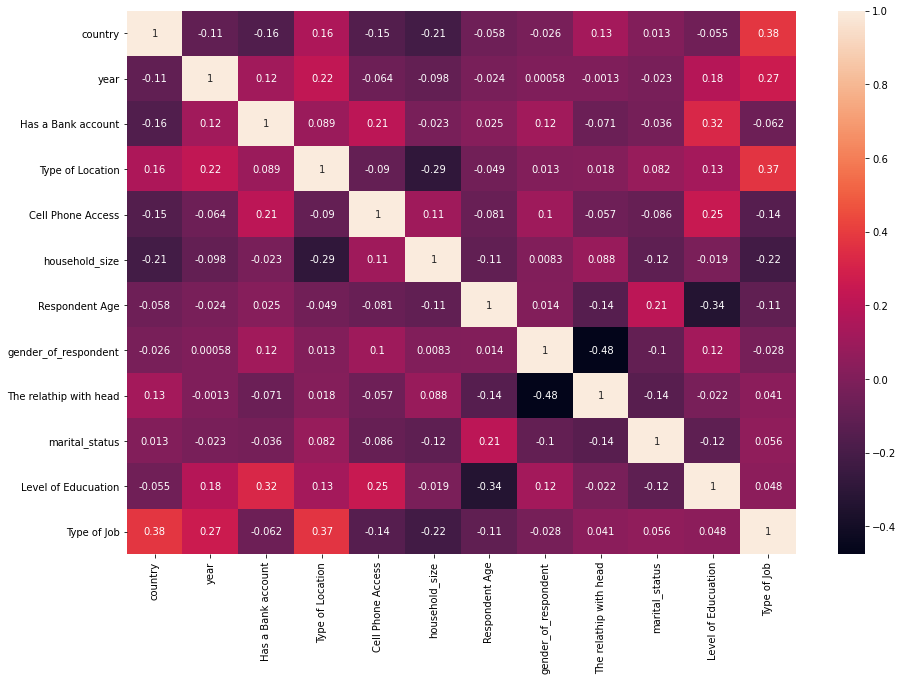

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()



In [ ]:
# Question: Determine the relationship between the household size and respondent age of vehicle 
# by determining the correlation coeffient.
# Calculating the pearson coefficient
pearson_coeff = df2["household_size"].corr(df2["Respondent Age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df3["household_size"].corr(df3["Respondent Age"]) 
print(coeff)

-0.105351661000559
-0.105351661000559


In [ ]:
# Question: Determine the relationship between the household size and respondent age of vehicle 
# by determining the correlation coeffient.
# Calculating the pearson coefficient
pearson_coeff = df2["The relathip with head"].corr(df2["gender_of_respondent"], method="pearson") 
print(pearson_coeff)

-0.4758427450249635


In [ ]:
# Question: Determine the relationship between the household size and respondent age of vehicle 
# by determining the correlation coeffient.
# Calculating the pearson coefficient
pearson_coeff = df3["Level of Educuation"].corr(df2["Has a Bank account"], method="pearson") 
print(pearson_coeff)

0.3245918167911243


* Having a bank account is moderately correlated with level of education of an individual with a correlation coeffient of 0.32. Therefore one of the factors to consider when looking at bank account presence is their individual level of education.

* The gender of the respondent and the access to a cell phone have weak positive correlation with having a bank account. They should therfore be considered but not as strongly as the level of education ofthe individual.

* The country, household size, relationship with the head of the family and marital status of an individual have weak negative correlation with whether an individual has a bank account or not. 


###c. Multivariate analysis

###PRINCIPAL COMPONENT ANALYSIS

In [ ]:
df1a=df1.drop(['uniqueid'], axis=1)
#df1b=df1a.drop('Has a Bank account', 1)
df2=df1a
df2.head()



,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df2['country']=lb.fit_transform(df2['country'])
#df2['Has a Bank account']=lb.fit_transform(df2['Has a Bank account'])
df2['Type of Location']=lb.fit_transform(df2['Type of Location'])
df2['Cell Phone Access']=lb.fit_transform(df2['Cell Phone Access'])
df2['gender_of_respondent']=lb.fit_transform(df2['gender_of_respondent'])
df2['The relathip with head']=lb.fit_transform(df2['The relathip with head'])
df2['marital_status']=lb.fit_transform(df2['marital_status'])
df2['Level of Educuation']=lb.fit_transform(df2['Level of Educuation'])
df2['Type of Job']=lb.fit_transform(df2['Type of Job'])

In [ ]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
X = df2.drop('Has a Bank account', 1)
y = df2['Has a Bank account']

In [ ]:
print(X)
print(y)

       country  year  ...  Level of Educuation  Type of Job
0            0  2018  ...                    4            9
1            0  2018  ...                    1            4
2            0  2018  ...                    6            9
3            0  2018  ...                    3            3
4            0  2018  ...                    3            5
...        ...   ...  ...                  ...          ...
23518        3  2018  ...                    3            6
23519        3  2018  ...                    1            7
23520        3  2018  ...                    4            7
23521        3  2018  ...                    3            7
23522        3  2018  ...                    4            9

[22903 rows x 11 columns]
0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23518     No
23519     No
23520     No
23521     No
23522     No
Name: Has a Bank account, Length: 22903, dtype: object


In [ ]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 18.13% variance. 
# Similarly, the second principal component causes 15.01% variance in the dataset, the third principal component causes 14.18% variance 
# and the fourth principal componet causes 10.19 variance. 
# We can see that the first two principal components collectively contribute to 33.15% variance in the feature set.
# Collectively we can say that (18.13 + 15.02 + 14.18 + 10.19) 57.52% percent of the classification information contained 
# in the feature set is captured by the first four principal components.
explained_variance

array([0.18130793, 0.15010112, 0.14189226, 0.10190427, 0.08738755,
       0.07492806, 0.06858378, 0.06106926, 0.05199683, 0.04232319,
       0.03850575])

In [ ]:
# Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)
occurrences = np.count_nonzero(y_pred)
print(occurrences)

['No' 'No' 'No' ... 'No' 'No' 'No']
4581


In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 3934 out of 4581 instances, 
# resulting in 85.87% accuracy.

[[3934    0]
 [ 647    0]]
Accuracy 0.8587644619078804


In [ ]:
# Results with 2 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 3 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3934    0]
 [ 647    0]]
Accuracy 0.8587644619078804


### Factor analysis

In [ ]:
# Adequacy Test
# Before we perform factor analysis,you need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(30893.231975242, 0.0)

In [ ]:
# Step 9:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.
# 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(X)
kmo_all
kmo_model

# The overall KMO for our data is 0.558, which is good enough to be rounded up to 0.6. 
# This value indicates that you can proceed with your planned factor analysis.

0.5581099319413283

In [ ]:
# Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.
# 

# Creating factor analysis object and perform factor 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(X,10, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Here, we can see only for 4-factors eigenvalues are greater than one. 
# It means we need to choose only 4 factors (or unobserved variables).

,Original_Eigenvalues
0,2.001838
1,1.652307
2,1.556101
3,1.123654
4,0.961401
5,0.822650
6,0.754407
7,0.666110
8,0.571321
9,0.468645


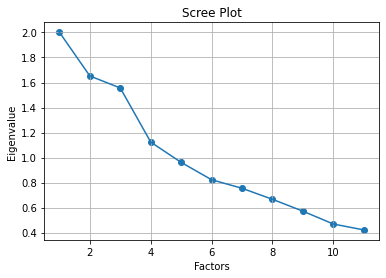

In [ ]:
# The scree plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a scree plot using matplotlib
#
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(X, 4, rotation="varimax")
fa.loadings

# Note that
# Factor 1 has high factor loadings for TYPE OF JOB(0.58) AND TYPE OF LOCATION(0.61) (economic status)
# Factor 2 has high factor loadings for GENDER OF RESPONDENT(0.54) AND RELATIONSHIP WITH THE HEAD OF THE FAMILY(0.91) (relationship)
# Factor 3 has high factor loadings for RESPONDENT AGE(0.53) AND LEVEL OF EDUCATION(0.61) (personan details)
# Factor 4 has high factor loadings for COUNTRY.(0.98) (nationality)

,Factor1,Factor2,Factor3,Factor4
country,0.163318,0.054659,-0.017397,0.982943
year,0.444375,0.013711,0.085450,-0.171855
Type of Location,0.605250,0.007133,-0.002608,0.070655
Cell Phone Access,-0.154993,-0.131584,0.305946,-0.121517
household_size,-0.379439,0.066882,0.175864,-0.141295
Respondent Age,-0.068439,-0.083100,-0.531013,-0.069655
gender_of_respondent,-0.014824,-0.541340,0.116407,0.009197
The relathip with head,-0.028704,0.905839,0.176091,0.080467
marital_status,0.112971,-0.044496,-0.329962,-0.012579
Level of Educuation,0.218864,-0.132535,0.613165,-0.092521


In [ ]:
# Performing factor analysis for 4 factors
# 
# Creating factor analysis object and perform factor analysis using 4 factors
fa = FactorAnalyzer()
fa.analyze(X, 4, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4
country,0.163318,0.054659,-0.017397,0.982943
year,0.444375,0.013711,0.085450,-0.171855
Type of Location,0.605250,0.007133,-0.002608,0.070655
Cell Phone Access,-0.154993,-0.131584,0.305946,-0.121517
household_size,-0.379439,0.066882,0.175864,-0.141295
Respondent Age,-0.068439,-0.083100,-0.531013,-0.069655
gender_of_respondent,-0.014824,-0.541340,0.116407,0.009197
The relathip with head,-0.028704,0.905839,0.176091,0.080467
marital_status,0.112971,-0.044496,-0.329962,-0.012579
Level of Educuation,0.218864,-0.132535,0.613165,-0.092521


In [ ]:
# Getting variance of each factors
# 
fa.get_factor_variance()

# Noting total 40% cumulative Variance explained by the 4 factors.

,Factor1,Factor2,Factor3,Factor4
SS Loadings,1.172206,1.167928,0.943537,1.133201
Proportion Var,0.106564,0.106175,0.085776,0.103018
Cumulative Var,0.106564,0.212739,0.298515,0.401534


#### Recommendations

Factor 1 has high factor loadings for TYPE OF JOB(0.58) AND TYPE OF LOCATION(0.61) (economic status).
Factor 2 has high factor loadings for GENDER OF RESPONDENT(0.54) AND RELATIONSHIP WITH THE HEAD OF THE FAMILY(0.91) (relationship).
Factor 3 has high factor loadings for RESPONDENT AGE(0.53) AND LEVEL OF EDUCATION(0.61) (personan details).
Factor 4 has high factor loadings for COUNTRY.(0.98) (nationality)

* The country an individual comes from is high predictor of whether an individual has a bank account or not and contributes a variance of 0.103 to the cumulative variance of 0.401.
* Economic factors such as the job type an individual has and the location they stay is another set of variables to be considered jointly as they contribute a proportion varaince of 0.106.
* Relationship status of an individual also needs to be considered.
* Other varaibles such as the year, access to cell phone, household size and marital status do not contribute to the likelihood of an individual having access to bank account.
* In summary, the country, type of job, type of location, gender, relationship with the head of the family, age and level of education are important factors in predicting whether an individual has access to bank account or not.




##5. Challenging the solution

* How does having access to a phone play a role in an individual's ability to access a bank accout or have one?
* If the year an individual responded to this survey, what/how important is it in future reference?
* Why doesnt marital status influence the ability of an individual having a bank account?

##6. Follow up questions

Refining our question or collecting new data, all in an iterative process to get at the truth.

a). Did we have the right data?

Yeah we do have the right data but it is not exhaustive of all variables that might affect having a bank acount or not in real life.

b). Do we need other data to answer our question?

We do  need more that complement this data and give it context and a better realistic understanding.

c). Did we have the right question?

Yeah we do, but maybe there is a way to ask more direct and specifc questions.